### Titanic Verisi Lojistik Regresyon, Hayatta Kalma Tahmini

In [121]:
import pandas as pd

In [122]:
df = pd.read_csv('titanic.csv')
df_copy = df.copy()

In [123]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
df.shape[:]

(891, 12)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### Veri Temizleme Ve Dummie Değişkenleri Elde Etme

In [126]:
df = df.drop(columns = ['Cabin'])

In [127]:
df.Age = df.Age.fillna(df.Age.mean())

In [128]:
df.Embarked = df.Embarked.fillna(str(df.Embarked.mode()))

In [129]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [130]:
df = pd.concat([df, sex, embark], axis = 1)

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1


In [132]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [133]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), uint8(4)
memory usage: 52.2 KB


### One vs All Lojistik Regresyon

In [135]:
import warnings
warnings.filterwarnings('ignore')

In [136]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Survived'])
Y = df.Survived

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [137]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [188]:
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
predictions = log_reg.predict(X_test)
predictions_train = log_reg.predict(X_train)

In [190]:
print('One vs All scores:\n---------------')
print('Eğitim Performansı:', log_reg.score(X_train, Y_train))
print('Test Performansı:', log_reg.score(X_test, Y_test))

One vs All scores:
---------------
Eğitim Performansı: 0.8033707865168539
Test Performansı: 0.7821229050279329


### Multinomial Soft Max Lojistik Regresyon

In [191]:
log_reg_soft = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
log_reg_soft.fit(X_train, Y_train)

predictions_soft = log_reg_soft.predict(X_test)

In [192]:
print('Softmax scores \n-----------------')
print('Eğitim Performansı:', log_reg_soft.score(X_train, Y_train))
print('Test Performansı:', log_reg_soft.score(X_test, Y_test))

Softmax scores 
-----------------
Eğitim Performansı: 0.7921348314606742
Test Performansı: 0.7821229050279329


### Kimler hayatta kalır?

In [193]:
X_2 = df_copy.drop(columns = ['Survived'])
Y_2 = df_copy.Survived

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 1)

In [194]:
survive = {'Name': X_2_test.Name, 'Survive': predictions}

In [195]:
table = pd.DataFrame(survive)
table

,Name,Survive
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",1
223,"Nenkoff, Mr. Christo",0
84,"Ilett, Miss. Bertha",1
680,"Peters, Miss. Katie",1
535,"Hart, Miss. Eva Miriam",1
623,"Hansen, Mr. Henry Damsgaard",0
148,"Navratil, Mr. Michel (""Louis M Hoffman"")",0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
34,"Meyer, Mr. Edgar Joseph",0
241,"Murphy, Miss. Katherine ""Kate""",1


### Performans Metrikleri

In [205]:
from sklearn.metrics import confusion_matrix
hata_matrisi_egitim = confusion_matrix(Y_train, predictions_train)
hata_matrisi_test = confusion_matrix(Y_test, predictions)

print('Eğitim Hata Matrisi:', '--'*15,'\n', hata_matrisi_egitim ,'\n'*2)
print('Test Hata Matrisi:', '--'*15,'\n', hata_matrisi_test)

Eğitim Hata Matrisi: ------------------------------ 
 [[386  57]
 [ 83 186]] 


Test Hata Matrisi: ------------------------------ 
 [[91 15]
 [24 49]]


In [206]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 91
Doğru pozitif sayısı   : 49
Yanlış pozitif sayısı  : 15
Yanlış negatif sayısı  : 24


In [207]:
TN = hata_matrisi_egitim[0][0]
TP = hata_matrisi_egitim[1][1]
FP = hata_matrisi_egitim[0][1]
FN = hata_matrisi_egitim[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 386
Doğru pozitif sayısı   : 186
Yanlış pozitif sayısı  : 57
Yanlış negatif sayısı  : 83


In [208]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg.score(X_test, Y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(Y_test, predictions))

Modelden alınan doğruluk değeri :  0.7821229050279329
Hesaplanan doğruluk değeri      :  0.8033707865168539
accuracy_score() değeri         :  0.7821229050279329


In [209]:
print('Hata Oranı:', 1-accuracy_score(Y_test, predictions))

Hata Oranı: 0.2178770949720671


In [210]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(Y_test, predictions))

Hesaplanan doğruluk değeri      :  0.7654320987654321
precision_score() değeri        :  0.765625


In [211]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(Y_test, predictions))

Hesaplanan doğruluk değeri   :  0.6914498141263941
recall_score() değeri        :  0.6712328767123288


In [213]:
print('Özgünlük(Specifity) Değeri:', TN/(TN + FP))

Özgünlük(Specifity) Değeri: 0.871331828442438


In [215]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(Y_test, predictions)
duyarlılık_değeri = recall_score(Y_test, predictions)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(Y_test, predictions))

Hesaplanan f1 skoru   :  0.7153284671532847
f1_score() değeri     :  0.7153284671532847


In [216]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(Y_test, predictions) )

print("f1_score() değeri        : {:.2f}".format(f1_score(Y_test, predictions)))
print("recall_score() değeri    : {:.2f}".format(recall_score(Y_test, predictions)))
print("precision_score() değeri : {:.2f}".format(precision_score(Y_test, predictions)))
print('\n')

metrikler =  precision_recall_fscore_support(Y_test, predictions)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       106
           1       0.77      0.67      0.72        73

   micro avg       0.78      0.78      0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

f1_score() değeri        : 0.72
recall_score() değeri    : 0.67
precision_score() değeri : 0.77


Hassasiyet : [0.79130435 0.765625  ]
Duyarlılık : [0.85849057 0.67123288]
F1 Skoru   : [0.82352941 0.71532847]


In [217]:
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]

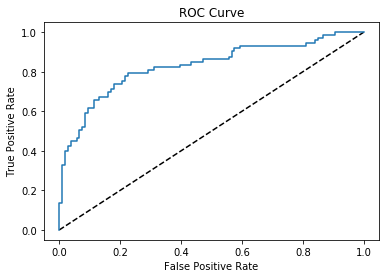

In [232]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(Y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [233]:
print('AUC Değeri : ', roc_auc_score(Y_test, predictions))

AUC Değeri :  0.7648617213750323


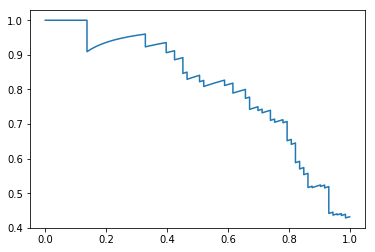

In [234]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(Y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [235]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(Y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(Y_test, predictions))

Logartimik Kayıp (log-loss) :  0.48926277715330374
Hata Oranı                  :  0.2178770949720671
